In [164]:
import perceval as pv 
from perceval.components import BS, PS
from perceval.rendering.circuit import SymbSkin, PhysSkin
import perceval.components.unitary_components as comp
from perceval.utils import BasicState, DensityMatrix
import numpy as np
from circuits import addPrep, deAddPrep
from collections import Counter

In [165]:
def getFidelityRho1(counts):
    totCounts, validCounts = 0, 0

    for state in counts:
        totCounts += counts[state]
        if state[0] == 1 and state[1] == 0:
            validCounts += counts[state]

    return validCounts/totCounts


def getFidelityRho2(counts):
    totCounts, validCounts = 0, 0

    for state in counts:
        totCounts += counts[state]
        if state[2] == 1 and state[3] == 0:
            validCounts += counts[state]

    return validCounts/totCounts


def getFidelityRho(counts):
    totCounts, validCounts = 0, 0

    for state in counts:
        totCounts += counts[state]
        if state[0] == state[2] and state[1] == state[3]:
            validCounts += counts[state]

    return validCounts/totCounts

def costFunctionAtPhi(counts):
    return (1 - getFidelityRho1(counts))**2 + (1 - getFidelityRho2(counts))**2 + (getFidelityRho1(counts)-getFidelityRho2(counts))**2

def run_circuit(input, circuit,sample_count=10000):
        sv = input

        p = pv.Processor("SLOS", circuit)
        p.with_input(sv)

        sampler = pv.algorithm.Sampler(p)  
        counts = sampler.sample_count(sample_count)['results']
        return counts

def get_state_vector(input,circuit, gate_idx=None):
    '''Returns the state vector given by the execution of
    circuit on the input state. If the optional parameter 
    gate_idx is provided, it returns the state vector after
    gate_idx gates'''
    
    sv = input
    stepper = pv.simulators.Stepper(pv.backends.SLOSBackend())
    stepper.set_circuit(circuit)
    # sv = pv.StateVector(sv)

    # we make the state vector evolve through all components of the circuit - here there is only one component
    stepIndex = 0

    # print(stepIndex, ')\t', sv, '\n')

    for r, c in circuit:
        if stepIndex == gate_idx:
            break
        sv = stepper.apply(sv, r, c)
        stepIndex += 1
        # print(stepIndex, ')\t', sv, '\n')

    return sv

def test_loss_function(circuit, sv):
    cost = 0
    counts = run_circuit(sv, circuit)
    cost += (1- getFidelityRho1(counts))**2
        
    return cost

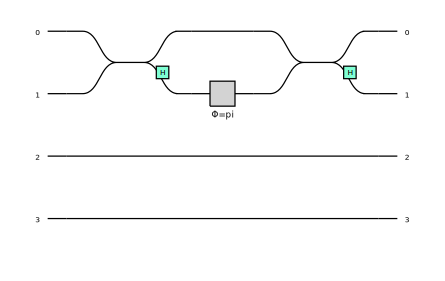

In [172]:
qc = pv.Circuit(4)
theta = np.pi
phi = 0
phase_shifter = comp.PS(theta)
qc.add(0, BS.H())
qc.add(1, phase_shifter)
qc.add(0, BS.H())
# addPrep(qc, theta, phi)
# qc.barrier()
# deAddPrep(qc, theta, phi)
# qc.add(0, BS.H())
# qc.add(1, phase_shifter)
# qc.add(0, BS.H())
# qc.add(1, phase_shifter)
pv.pdisplay(qc, skin=SymbSkin())


In [173]:
input = pv.StateVector([1,0,1,0])
print(run_circuit(input, qc))
print(get_state_vector(input, qc))

{
  |0,1,1,0>: 10000
}
|0,1,1,0>
[warning] Setting a value for min_detected_photons will soon be mandatory, please change your scripts accordingly. Use the method processor.min_detected_photons_filter(value) before any call of processor.with_input(input). The current deduced value of min_detected_photons is 2


In [174]:
test_loss_function(qc, input)

[warning] Setting a value for min_detected_photons will soon be mandatory, please change your scripts accordingly. Use the method processor.min_detected_photons_filter(value) before any call of processor.with_input(input). The current deduced value of min_detected_photons is 2


1.0